# Webscraping Project 

###  Fetching parisian restaurants from TripAdvisor

In [ ]:
from apify_client import ApifyClient

# Initialize the ApifyClient with your Apify API token
# Replace '<YOUR_API_TOKEN>' with your token.
client = ApifyClient("INSERT_YOUR_API_KEY_HERE")

# Prepare the Actor input
run_input = {
  "includeAiReviewsSummary": False,
  "includeAttractions": False,
  "includeHotels": False,
  "includeNearbyResults": False,
  "includePriceOffers": False,
  "includeRestaurants": True,
  "includeTags": True,
  "includeVacationRentals": False,
  "language": "en",
  "maxItemsPerQuery": 100,
  "startUrls": [
    {
      "url": "https://www.tripadvisor.com/Restaurants-g187147-Paris_Ile_de_France.html",
      "method": "GET"
    }
  ],
  "checkInDate": "",
  "checkOutDate": "",
  "currency": "USD"
}

# Run the Actor and wait for it to finish
run = client.actor("maxcopell/tripadvisor").call(run_input=run_input)

# Fetch and print Actor results from the run's dataset (if there are any)
print("💾 Check your data here: https://console.apify.com/storage/datasets/" + run["defaultDatasetId"])
for item in client.dataset(run["defaultDatasetId"]).iterate_items():
    print(item)

# 📚 Want to learn more 📖? Go to → https://docs.apify.com/api/client/python/docs/quick-start

💾 Check your data here: https://console.apify.com/storage/datasets/DZyMxsgyq6eqjudzO
{'id': '12714552', 'type': 'RESTAURANT', 'category': 'restaurant', 'subcategories': ['Sit down'], 'name': 'Pizzeria Arrivederci', 'locationString': 'Paris, Ile-de-France', 'description': 'Smart pizza place in 5arrondisement. Here you can taste real Italian pizza with all fresh productos... Just taste it and you travel to Italy!!!', 'image': 'https://media-cdn.tripadvisor.com/media/photo-w/1c/55/7e/b3/la-poesia-a-tavola.jpg', 'photoCount': 1470, 'rankingPosition': 1, 'rating': 5, 'rawRanking': 4.9199652671813965, 'phone': '+33 1 77 32 45 57', 'address': '47 rue Gay Lussac, 75005 Paris France', 'addressObj': {'street1': '47 rue Gay Lussac', 'street2': None, 'city': 'Paris', 'state': None, 'country': 'France', 'postalcode': '75005'}, 'localName': 'Pizzeria Arrivederci', 'localAddress': None, 'localLangCode': 'fr', 'email': 'arriedercinfo@gmail.com', 'latitude': 48.84172, 'longitude': 2.343511, 'webUrl': '

In [71]:
import pandas as pd

# Initialize an empty list to collect the items
items_list = []

# Iterate over the dataset items and append each item to the list
for item in client.dataset(run["defaultDatasetId"]).iterate_items():
    items_list.append(item)
    
df = pd.DataFrame(items_list)

df.head()


,id,type,category,subcategories,name,locationString,description,image,photoCount,rankingPosition,...,travelerChoiceAward,cuisines,dietaryRestrictions,establishmentTypes,features,mealTypes,isClaimedIcon,isClaimedText,orderOnline,input
0,12714552,RESTAURANT,restaurant,[Sit down],Pizzeria Arrivederci,"Paris, Ile-de-France",Smart pizza place in 5arrondisement. Here you ...,https://media-cdn.tripadvisor.com/media/photo-...,1470,1,...,None,"[Italian, Pizza, Mediterranean, European, Heal...","[Vegetarian friendly, Vegan options]",[Restaurants],"[Delivery, Takeout, Reservations, Seating, Ser...","[Lunch, Dinner]",False,None,"[{'providerType': 'RESERVATION', 'canProvideTi...",https://www.tripadvisor.com/Restaurants-g18714...
1,718750,RESTAURANT,restaurant,[Sit down],Tour d'Argent,"Paris, Ile-de-France",None,https://media-cdn.tripadvisor.com/media/photo-...,1558,220,...,None,[French],[Vegetarian friendly],[Restaurants],"[Reservations, Private Dining, Seating, Valet ...","[Lunch, Dinner]",False,None,[],https://www.tripadvisor.com/Restaurants-g18714...
2,1076810,RESTAURANT,restaurant,[Sit down],Louise Cafe,"Paris, Ile-de-France","café, brasserie familiale au cœur du PARIS his...",https://media-cdn.tripadvisor.com/media/photo-...,182,645,...,None,"[French, Cafe, European]","[Vegetarian friendly, Vegan options, Gluten fr...",[Restaurants],"[Reservations, Outdoor Seating, Seating, Wheel...","[Breakfast, Lunch, Dinner, Brunch, Late Night]",False,None,"[{'providerType': 'RESERVATION', 'canProvideTi...",https://www.tripadvisor.com/Restaurants-g18714...
3,6622741,RESTAURANT,restaurant,[Sit down],Postiche,"Paris, Ile-de-France",Le Postiche propose une cuisine maison typée b...,https://media-cdn.tripadvisor.com/media/photo-...,97,577,...,None,[French],[Vegetarian friendly],[Restaurants],"[Reservations, Outdoor Seating, Private Dining...","[Lunch, Dinner, Drinks]",True,None,"[{'providerType': 'RESERVATION', 'canProvideTi...",https://www.tripadvisor.com/Restaurants-g18714...
4,6633751,RESTAURANT,restaurant,[Sit down],Sacree fleur,"Paris, Ile-de-France",Sacree fleur (ex Marguerite) is a traditional ...,https://media-cdn.tripadvisor.com/media/photo-...,1643,91,...,None,"[French, Steakhouse, European]",[],[Restaurants],"[Reservations, Seating, Wheelchair Accessible,...","[Lunch, Dinner]",True,None,[],https://www.tripadvisor.com/Restaurants-g18714...


In [72]:
filtered_df = df.filter(items=["rankingPosition", "name", "webUrl", "rating"])
filtered_df

,rankingPosition,name,webUrl,rating
0,1,Pizzeria Arrivederci,https://www.tripadvisor.com/Restaurant_Review-...,5.0
1,220,Tour d'Argent,https://www.tripadvisor.com/Restaurant_Review-...,4.5
2,645,Louise Cafe,https://www.tripadvisor.com/Restaurant_Review-...,4.5
3,577,Postiche,https://www.tripadvisor.com/Restaurant_Review-...,4.5
4,91,Sacree fleur,https://www.tripadvisor.com/Restaurant_Review-...,4.5
...,...,...,...,...
71,920,Restaurant Obrigado Paris,https://www.tripadvisor.com/Restaurant_Review-...,4.5
72,909,BigLove,https://www.tripadvisor.com/Restaurant_Review-...,4.0
73,926,La Marine,https://www.tripadvisor.com/Restaurant_Review-...,4.0
74,1881,Ambos,https://www.tripadvisor.com/Restaurant_Review-...,4.5


In [73]:
filtered_df.to_csv("data/restaurants.csv")

In [74]:
sorted_df = filtered_df.sort_values("rankingPosition", axis = 0)
sorted_df

,rankingPosition,name,webUrl,rating
0,1,Pizzeria Arrivederci,https://www.tripadvisor.com/Restaurant_Review-...,5.0
38,3,Il Etait Un Square,https://www.tripadvisor.com/Restaurant_Review-...,5.0
39,5,Bistro Chez Pradel,https://www.tripadvisor.com/Restaurant_Review-...,5.0
23,8,Boutary Restaurant,https://www.tripadvisor.com/Restaurant_Review-...,5.0
26,57,The Frog at Bercy Village,https://www.tripadvisor.com/Restaurant_Review-...,4.5
...,...,...,...,...
74,1881,Ambos,https://www.tripadvisor.com/Restaurant_Review-...,4.5
43,2442,Ambassade d’Auvergne,https://www.tripadvisor.com/Restaurant_Review-...,4.0
50,2616,Derriere,https://www.tripadvisor.com/Restaurant_Review-...,3.5
56,2748,Le Baratin,https://www.tripadvisor.com/Restaurant_Review-...,4.0


In [75]:
# Slice the DataFrame to get the second row (Pandas uses 0-based indexing)
top_restaurants = sorted_df.iloc[:2, :]
top_restaurants_dict = {"restaurants": []}  # Initialize an empty list under the "restaurants" key

for index, restaurant in top_restaurants.iterrows():
    top_restaurants_dict["restaurants"].append({
        'url': restaurant['webUrl'],  # Ensure this matches the actual column name
        'name': restaurant['name'],   # Ensure this matches the actual column name
        'score': restaurant['rating'], # Ensure this matches the actual column name
        'rank': restaurant['rankingPosition']    # Ensure this matches the actual column name
    })

# Print the resulting dictionary
print(top_restaurants_dict)


{'restaurants': [{'url': 'https://www.tripadvisor.com/Restaurant_Review-g187147-d12714552-Reviews-Pizzeria_Arrivederci-Paris_Ile_de_France.html', 'name': 'Pizzeria Arrivederci', 'score': 5.0, 'rank': 1}, {'url': 'https://www.tripadvisor.com/Restaurant_Review-g187147-d6575305-Reviews-Il_Etait_Un_Square-Paris_Ile_de_France.html', 'name': 'Il Etait Un Square', 'score': 5.0, 'rank': 3}]}


In [76]:
bottom_restaurants = sorted_df.iloc[-2:, :]
bottom_restaurants_dict = {"restaurants": []}  # Initialize an empty list under the "restaurants" key

for index, restaurant in bottom_restaurants.iterrows():
    bottom_restaurants_dict["restaurants"].append({
        'url': restaurant['webUrl'],  # Ensure this matches the actual column name
        'name': restaurant['name'],   # Ensure this matches the actual column name
        'score': restaurant['rating'], # Ensure this matches the actual column name
        'rank': restaurant['rankingPosition']    # Ensure this matches the actual column name
    })

# Print the resulting dictionary
print(bottom_restaurants_dict)

{'restaurants': [{'url': 'https://www.tripadvisor.com/Restaurant_Review-g187147-d718799-Reviews-Le_Baratin-Paris_Ile_de_France.html', 'name': 'Le Baratin', 'score': 4.0, 'rank': 2748}, {'url': 'https://www.tripadvisor.com/Restaurant_Review-g187147-d25130446-Reviews-Sphere-Paris_Ile_de_France.html', 'name': 'Sphere', 'score': 4.0, 'rank': 2925}]}


###  Fetching parisian hotels from TripAdvisor

In [ ]:
from apify_client import ApifyClient

# Initialize the ApifyClient with your Apify API token
client = ApifyClient("INSERT_YOUR_API_KEY_HERE")

# Prepare the Actor input
run_input = {
  "includeAiReviewsSummary": False,
  "includeAttractions": False,
  "includeHotels": True,
  "includeNearbyResults": False,
  "includePriceOffers": False,
  "includeRestaurants": False,
  "includeTags": True,
  "includeVacationRentals": False,
  "language": "en",
  "maxItemsPerQuery": 100,
  "startUrls": [
    {
      "url": "https://www.tripadvisor.com/Hotels-g187147-Paris_Ile_de_France-Hotels.html",
      "method": "GET"
    }
  ],
  "checkInDate": "",
  "checkOutDate": "",
  "currency": "USD"
}

# Run the Actor and wait for it to finish
run = client.actor("maxcopell/tripadvisor").call(run_input=run_input)

# Fetch and print Actor results from the run's dataset (if there are any)
print("💾 Check your data here: https://console.apify.com/storage/datasets/" + run["defaultDatasetId"])
for item in client.dataset(run["defaultDatasetId"]).iterate_items():
    print(item)

# 📚 Want to learn more 📖? Go to → https://docs.apify.com/api/client/python/docs/quick-start

💾 Check your data here: https://console.apify.com/storage/datasets/zbfXgB96cvOezOdco
{'reviewTags': [{'text': 'eiffel tower', 'reviews': 873}, {'text': 'a rick steves tour', 'reviews': 41}, {'text': 'rooms are small', 'reviews': 134}, {'text': 'paris tour', 'reviews': 19}, {'text': 'charming hotel', 'reviews': 64}, {'text': 'ecole militaire', 'reviews': 41}, {'text': 'around the corner', 'reviews': 103}, {'text': 'de mars', 'reviews': 24}, {'text': 'croissants', 'reviews': 101}, {'text': 'adjoining rooms', 'reviews': 29}, {'text': 'perfect location', 'reviews': 89}, {'text': 'few blocks', 'reviews': 46}, {'text': 'breakfast was delicious', 'reviews': 32}, {'text': 'home away from home', 'reviews': 27}, {'text': 'would definitely stay here again', 'reviews': 56}, {'text': 'the entire staff', 'reviews': 24}, {'text': 'minute walk', 'reviews': 67}, {'text': 'a wonderful stay', 'reviews': 32}, {'text': 'within easy walking distance', 'reviews': 25}, {'text': 'metro stop', 'reviews': 43}, {

In [78]:
import pandas as pd

# Initialize an empty list to collect the items
items_list = []

# Iterate over the dataset items and append each item to the list
for item in client.dataset(run["defaultDatasetId"]).iterate_items():
    items_list.append(item)
    
df = pd.DataFrame(items_list)

df.head()


,reviewTags,id,type,category,subcategories,name,locationString,description,image,photoCount,...,isNearbyResult,checkInDate,checkOutDate,numberOfRooms,categoryReviewScores,aiReviewsSummary,whatsAppRedirectUrl,photos,travelerChoiceAward,input
0,"[{'text': 'eiffel tower', 'reviews': 873}, {'t...",265476,HOTEL,hotel,[Hotel],Hotel de Londres Eiffel,"Paris, Ile-de-France","Independent charming hotel, L'Hotel de Londres...",https://media-cdn.tripadvisor.com/media/photo-...,990,...,False,2024-12-15,2024-12-16,30,[],None,None,[https://media-cdn.tripadvisor.com/media/photo...,BEST_OF_THE_BEST_AWARD,https://www.tripadvisor.com/Hotels-g187147-Par...
1,"[{'text': 'first floor', 'reviews': 14}, {'tex...",263663,HOTEL,hotel,[Specialty Lodging],Le Village Hostel,"Paris, Ile-de-France",Le Village Montmartre by Hiphophostels is when...,https://media-cdn.tripadvisor.com/media/photo-...,292,...,False,2024-12-15,2024-12-16,26,[],None,None,[https://media-cdn.tripadvisor.com/media/photo...,None,https://www.tripadvisor.com/Hotels-g187147-Par...
2,"[{'text': 'kosher breakfast', 'reviews': 4}, {...",229554,HOTEL,hotel,[Hotel],Hotel Aida Opera,"Paris, Ile-de-France",A genuine Haussmann way architecture building ...,https://media-cdn.tripadvisor.com/media/photo-...,155,...,False,2024-12-15,2024-12-16,58,[],None,None,[https://media-cdn.tripadvisor.com/media/photo...,REGULAR_AWARD,https://www.tripadvisor.com/Hotels-g187147-Par...
3,"[{'text': 'jean marie', 'reviews': 61}, {'text...",188729,HOTEL,hotel,[Hotel],Le Bristol Paris,"Paris, Ile-de-France","Faubourg Saint Honoré, au cœur du Paris de la ...",https://media-cdn.tripadvisor.com/media/photo-...,1473,...,False,2024-12-15,2024-12-16,190,[],None,None,[https://media-cdn.tripadvisor.com/media/photo...,BEST_OF_THE_BEST_AWARD,https://www.tripadvisor.com/Hotels-g187147-Par...
4,[],25547942,HOTEL,hotel,[Hotel],Bloom House Hotel & Spa,"Paris, Ile-de-France",A green oasis in the heart of the 10th arrondi...,https://media-cdn.tripadvisor.com/media/photo-...,91,...,False,2024-12-15,2024-12-16,91,[],None,None,[https://media-cdn.tripadvisor.com/media/photo...,None,https://www.tripadvisor.com/Hotels-g187147-Par...


In [79]:
filtered_df = df.filter(items=["rankingPosition", "name", "webUrl", "rating"])
filtered_df

,rankingPosition,name,webUrl,rating
0,7,Hotel de Londres Eiffel,https://www.tripadvisor.com/Hotel_Review-g1871...,5.0
1,3,Le Village Hostel,https://www.tripadvisor.com/Hotel_Review-g1871...,4.0
2,631,Hotel Aida Opera,https://www.tripadvisor.com/Hotel_Review-g1871...,4.0
3,69,Le Bristol Paris,https://www.tripadvisor.com/Hotel_Review-g1871...,5.0
4,348,Bloom House Hotel & Spa,https://www.tripadvisor.com/Hotel_Review-g1871...,4.5
...,...,...,...,...
71,19,Hotel Regent's Garden - Astotel,https://www.tripadvisor.com/Hotel_Review-g1871...,4.5
72,914,Hotel Campanile Paris Bercy Village,https://www.tripadvisor.com/Hotel_Review-g1871...,4.0
73,42,Hotel Bel Ami,https://www.tripadvisor.com/Hotel_Review-g1871...,4.5
74,6,Hotel des Arts - Montmartre,https://www.tripadvisor.com/Hotel_Review-g1871...,4.5


In [80]:
filtered_df.to_csv("data/hotels.csv")

In [81]:
sorted_df = filtered_df.sort_values("rankingPosition", axis = 0)
sorted_df

,rankingPosition,name,webUrl,rating
36,1,The People - Paris Bercy,https://www.tripadvisor.com/Hotel_Review-g1871...,4.5
34,1,Hotel Grand Powers,https://www.tripadvisor.com/Hotel_Review-g1871...,5.0
57,2,Hotel Malte Astotel,https://www.tripadvisor.com/Hotel_Review-g1871...,5.0
1,3,Le Village Hostel,https://www.tripadvisor.com/Hotel_Review-g1871...,4.0
27,4,JO&JOE Paris Nation Hotel,https://www.tripadvisor.com/Hotel_Review-g1871...,4.0
...,...,...,...,...
20,838,Belambra City - Hotel Magendie,https://www.tripadvisor.com/Hotel_Review-g1871...,4.0
18,848,Mercure Paris Montmartre Sacre Coeur,https://www.tripadvisor.com/Hotel_Review-g1871...,4.0
60,881,Pullman Paris Eiffel Tower,https://www.tripadvisor.com/Hotel_Review-g1871...,4.0
72,914,Hotel Campanile Paris Bercy Village,https://www.tripadvisor.com/Hotel_Review-g1871...,4.0


In [82]:
# Slice the DataFrame to get the second row (Pandas uses 0-based indexing)
top_hotels = sorted_df.iloc[:2, :]
top_hotels_dict = {"hotels": []}  # Initialize an empty list under the "restaurants" key

for index, hotel in top_hotels.iterrows():
    top_hotels_dict["hotels"].append({
        'url': hotel['webUrl'],  # Ensure this matches the actual column name
        'name': hotel['name'],   # Ensure this matches the actual column name
        'score': hotel['rating'], # Ensure this matches the actual column name
        'rank': hotel['rankingPosition']    # Ensure this matches the actual column name
    })

# Print the resulting dictionary
print(top_hotels_dict)


{'hotels': [{'url': 'https://www.tripadvisor.com/Hotel_Review-g187147-d17764614-Reviews-The_People_Paris_Bercy-Paris_Ile_de_France.html', 'name': 'The People - Paris Bercy', 'score': 4.5, 'rank': 1}, {'url': 'https://www.tripadvisor.com/Hotel_Review-g187147-d228837-Reviews-Hotel_Grand_Powers-Paris_Ile_de_France.html', 'name': 'Hotel Grand Powers', 'score': 5.0, 'rank': 1}]}


In [83]:
bottom_hotels = sorted_df.iloc[-2:, :]
bottom_hotels_dict = {"hotels": []}  # Initialize an empty list under the "restaurants" key

for index, hotel in bottom_hotels.iterrows():
    bottom_hotels_dict["hotels"].append({
        'url': hotel['webUrl'],  # Ensure this matches the actual column name
        'name': hotel['name'],   # Ensure this matches the actual column name
        'score': hotel['rating'], # Ensure this matches the actual column name
        'rank': hotel['rankingPosition']    # Ensure this matches the actual column name
    })

# Print the resulting dictionary
print(bottom_hotels_dict)

{'hotels': [{'url': 'https://www.tripadvisor.com/Hotel_Review-g187147-d233766-Reviews-Hotel_Campanile_Paris_Bercy_Village-Paris_Ile_de_France.html', 'name': 'Hotel Campanile Paris Bercy Village', 'score': 4.0, 'rank': 914}, {'url': 'https://www.tripadvisor.com/Hotel_Review-g187147-d1149494-Reviews-Mama_Shelter_Paris_East-Paris_Ile_de_France.html', 'name': 'Mama Shelter Paris East', 'score': 4.0, 'rank': 939}]}


### Gpt model

In [84]:
!playwright install  
import json
from scrapegraphai.graphs import SmartScraperGraph
from scrapegraphai.graphs import SmartScraperMultiGraph

# Define the configuration for the scraping pipeline
graph_config = {
    "llm": {
        "api_key": "INSERT_YOUR_API_KEY_HERE",
        "model": "openai/gpt-4o-mini",
    },
    "verbose": True,
    "headless": False,
}


# smart_scraper_graph = SmartScraperGraph(
#     prompt="""
# Task:let's think step by step...
#  1. Find the restruant name  2. find all comments.  3. Think about what is the toxic comments  4. analysis if its toxic.
# ---
# One of the comments for example:
# title of review:Chocolat chaud trop sucrénov. time:2024 • tag:family
# comments:Nous avons voulu essayer leur fameux chocolat chaud... mais quelle déception. Trop sucré, nous n'avons pas pu le terminer. C'était tellement sucré que nous étions à deux doigts de vomir.
# ---
# output:
# { 
#     "comment": "", 
#     "toxic": "true",  
#   }, 

#     """,
#     source="https://www.tripadvisor.fr/Restaurant_Review-g187147-d742400-Reviews-La_Jacobine-Paris_Ile_de_France.html",
#     config=graph_config
# )

smart_scraper_multi_lite_graph = SmartScraperMultiGraph(
    prompt = """
Task: Extract details from the given comments and classify their toxicity.
Instructions:
1. Identify the restaurant or hotel name. 
2. Extract comments for each restaurant or hotel. 
3. If you are an Experienced tourist, think about what the toxic comments is 
4. Analyze each comment for toxicity.
5. Output the results in valid JSON format enclosed in triple backticks.

Example Output:{ "restaurant": { "name": "Chez Nicos", "score": 4.5, "rank": "#2 of 18,864 Restaurants in Paris", "comments": [ { "comment": "Chocolat chaud trop sucré... Nous étions à deux doigts de vomir.", "toxic": true } ] } hotel: { "name": "The People Paris Bercy", "score": 4.2, "rank": "#3,914 of 18,864 Restaurants in Paris", "comments": [ { "comment": "Expensive and worth it", "toxic": false } ] } }
""",
    source= [
        "https://www.tripadvisor.com/Restaurant_Review-g187147-d1327112-Reviews-Chez_Nicos-Paris_Ile_de_France.html",          #best restaurant
        "https://www.tripadvisor.com/Restaurant_Review-g187147-d4451589-Reviews-New_Jawad_Longchamp-Paris_Ile_de_France.html", # worst restaurant
        "https://www.tripadvisor.com/Restaurant_Review-g187147-d796575-Reviews-Ciel_de_Paris-Paris_Ile_de_France.html",
        "https://www.tripadvisor.com/Restaurant_Review-g187147-d695212-Reviews-Bofinger-Paris_Ile_de_France.html",
        "https://www.tripadvisor.com/Hotel_Review-g187147-d17764614-Reviews-The_People_Paris_Bercy-Paris_Ile_de_France.html",
        "https://www.tripadvisor.com/Hotel_Review-g187147-d228837-Reviews-Hotel_Grand_Powers-Paris_Ile_de_France.html",
        "https://www.tripadvisor.com/Hotel_Review-g187147-d228837-Reviews-Hotel_Grand_Powers-Paris_Ile_de_France.html",
        "https://www.tripadvisor.com/Hotel_Review-g187147-d1149494-Reviews-Mama_Shelter_Paris_East-Paris_Ile_de_France.html"                                                
    ],
    config=graph_config
)
import nest_asyncio
nest_asyncio.apply()
result = smart_scraper_multi_lite_graph.run()
# Save the result to a JSON file
output_filename = "data/llm_output.json"
with open(output_filename, "w", encoding="utf-8") as json_file:
    json.dump(result, json_file, indent=4, ensure_ascii=False)

print(f"Results have been saved to {output_filename}")


--- Executing GraphIterator Node with batchsize 16 ---
processing graph instances:   0%|          | 0/8 [00:00<?, ?it/s]--- Executing Fetch Node ---
--- Executing Fetch Node ---
--- Executing Fetch Node ---
--- (Fetching HTML from: https://www.tripadvisor.com/Restaurant_Review-g187147-d695212-Reviews-Bofinger-Paris_Ile_de_France.html) ---
--- Executing Fetch Node ---
--- Executing Fetch Node ---
--- Executing Fetch Node ---
--- Executing Fetch Node ---
--- Executing Fetch Node ---
--- (Fetching HTML from: https://www.tripadvisor.com/Hotel_Review-g187147-d228837-Reviews-Hotel_Grand_Powers-Paris_Ile_de_France.html) ---
--- (Fetching HTML from: https://www.tripadvisor.com/Restaurant_Review-g187147-d4451589-Reviews-New_Jawad_Longchamp-Paris_Ile_de_France.html) ---
--- (Fetching HTML from: https://www.tripadvisor.com/Hotel_Review-g187147-d17764614-Reviews-The_People_Paris_Bercy-Paris_Ile_de_France.html) ---
--- (Fetching HTML from: https://www.tripadvisor.com/Hotel_Review-g187147-d1149494-R

Results have been saved to data/llm_output.json


### Analysis

In [85]:
import json

# Load the JSON data
filename = "data/llm_output.json"
with open(filename, "r", encoding="utf-8") as file:
    data = json.load(file)

# Initialize counters
toxicity_analysis = {
    "restaurants": {"total_comments": 0, "toxic_comments": 0, "non_toxic_comments": 0},
    "hotels": {"total_comments": 0, "toxic_comments": 0, "non_toxic_comments": 0},
}

# Function to analyze toxicity
def analyze_toxicity(category, items):
    for item in items:
        for comment in item["comments"]:
            toxicity_analysis[category]["total_comments"] += 1
            if comment["toxic"]:
                toxicity_analysis[category]["toxic_comments"] += 1
            else:
                toxicity_analysis[category]["non_toxic_comments"] += 1

# Analyze restaurants and hotels
analyze_toxicity("restaurants", data["restaurants"])
analyze_toxicity("hotels", data["hotels"])

# Calculate percentages
for category in toxicity_analysis:
    total = toxicity_analysis[category]["total_comments"]
    toxic = toxicity_analysis[category]["toxic_comments"]
    non_toxic = toxicity_analysis[category]["non_toxic_comments"]
    toxicity_analysis[category]["toxic_percentage"] = (toxic / total * 100) if total > 0 else 0
    toxicity_analysis[category]["non_toxic_percentage"] = (non_toxic / total * 100) if total > 0 else 0

# Print the analysis results
print("Toxicity Analysis:")
for category, stats in toxicity_analysis.items():
    print(f"\nCategory: {category.capitalize()}")
    print(f"  Total Comments: {stats['total_comments']}")
    print(f"  Toxic Comments: {stats['toxic_comments']} ({stats['toxic_percentage']:.2f}%)")
    print(f"  Non-Toxic Comments: {stats['non_toxic_comments']} ({stats['non_toxic_percentage']:.2f}%)")

Toxicity Analysis:

Category: Restaurants
  Total Comments: 40
  Toxic Comments: 15 (37.50%)
  Non-Toxic Comments: 25 (62.50%)

Category: Hotels
  Total Comments: 16
  Toxic Comments: 10 (62.50%)
  Non-Toxic Comments: 6 (37.50%)


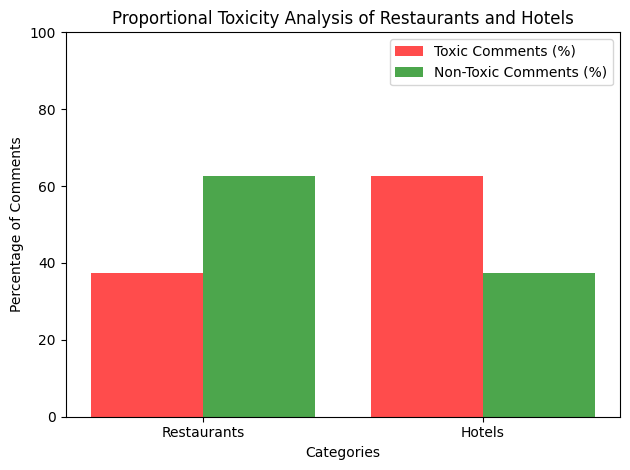

In [86]:
import matplotlib.pyplot as plt

# Calculate proportions
categories = list(toxicity_analysis.keys())
toxic_proportions = [
    (toxicity_analysis[cat]["toxic_comments"] / toxicity_analysis[cat]["total_comments"]) * 100
    for cat in categories
]
non_toxic_proportions = [
    (toxicity_analysis[cat]["non_toxic_comments"] / toxicity_analysis[cat]["total_comments"]) * 100
    for cat in categories
]

# Plot the graph
x = range(len(categories))
width = 0.4

plt.bar(x, toxic_proportions, width, label="Toxic Comments (%)", color="red", alpha=0.7)
plt.bar([p + width for p in x], non_toxic_proportions, width, label="Non-Toxic Comments (%)", color="green", alpha=0.7)

# Add labels and title
plt.xlabel("Categories")
plt.ylabel("Percentage of Comments")
plt.title("Proportional Toxicity Analysis of Restaurants and Hotels")
plt.xticks([p + width / 2 for p in x], ["Restaurants", "Hotels"])
plt.ylim(0, 100)
plt.legend()

# Show the graph
plt.tight_layout()
plt.show()